In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
#tf.keras.utils.get_file('flower_photos',origin=url,cache_dir='.',untar=True)

In [3]:
#  os.getcwd()

'C:\\Users\\DKIN'

In [4]:
path='.\\datasets\\flower_photos'

In [5]:
import pathlib
data=pathlib.Path(path)
data

WindowsPath('datasets/flower_photos')

In [6]:
image_count =len(list(data.glob('*/*.jpg')))
image_count

3670

In [7]:
rose= list(data.glob('roses/*'))
rose[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

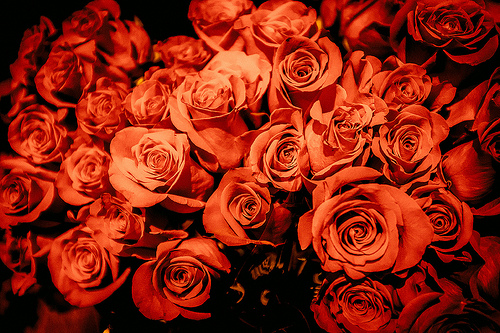

In [8]:
 PIL.Image.open(str(rose[2]))

In [9]:
flower_image_dic={'roses':list(data.glob('roses/*')),
                 'daisy':list(data.glob('daisy/*')),
                 'dandelion':list(data.glob('dandelion/*')),
                 'sunflowers':list(data.glob('sunflowers/*')),
                 'tulips':list(data.glob('tulips/*'))
                 }

In [10]:
flower_labels_dic={'roses':0,
                 'daisy':1,
                 'dandelion':2,
                 'sunflowers':3,
                 'tulips':4
                 }

In [11]:
#img=cv2.imread(str(flower_image_dic['roses'][0]))
x,y = [],[]

for flower_name, image in flower_image_dic.items():
    for image in image:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dic[flower_name])

In [12]:
x=np.array(x)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =9)


In [18]:
x_train_s = x_train / 255
x_test_s = x_test / 255

In [19]:
model = Sequential([
    layers.Conv2D(16, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
model.fit(x_train_s, y_train, epochs=10)

Epoch 1/50
86/86 [==============================] - 50s 412ms/step - loss: 1.3818 - accuracy: 0.4211
Epoch 2/50
86/86 [==============================] - 35s 405ms/step - loss: 1.0500 - accuracy: 0.5836
Epoch 3/50
86/86 [==============================] - 35s 401ms/step - loss: 0.8618 - accuracy: 0.6708
Epoch 4/50
86/86 [==============================] - 35s 402ms/step - loss: 0.7008 - accuracy: 0.7420
Epoch 5/50
86/86 [==============================] - 35s 403ms/step - loss: 0.4932 - accuracy: 0.8270
Epoch 6/50
86/86 [==============================] - 36s 415ms/step - loss: 0.3040 - accuracy: 0.9001
Epoch 7/50
86/86 [==============================] - 37s 425ms/step - loss: 0.2239 - accuracy: 0.9299
Epoch 8/50
86/86 [==============================] - 35s 409ms/step - loss: 0.1021 - accuracy: 0.9709
Epoch 9/50
86/86 [==============================] - 35s 402ms/step - loss: 0.0729 - accuracy: 0.9840
Epoch 10/50
86/86 [==============================] - 34s 400ms/step - loss: 0.0527 - accura

In [22]:
model.evaluate(x_test_s,y_test)

29/29 [==============================] - 6s 124ms/step - loss: 3.0678 - accuracy: 0.6558


[3.0677647590637207, 0.655773401260376]

In [24]:
predictions = model.predict(x_test_s)

In [36]:
predictions[12]

array([ 3.1555033 , 25.076801  ,  0.80193406,  5.9574695 , 16.008474  ],
      dtype=float32)

In [37]:
score=tf.nn.softmax(predictions[12])

In [38]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0175243e-10, 9.9988472e-01, 2.8675349e-11, 4.9719850e-09,
       1.1524592e-04], dtype=float32)>

In [39]:
np.argmax(score)

1

In [41]:
y_test[12]

1

In [55]:
data_aug = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [56]:
model1 = Sequential([
    data_aug,
    layers.Conv2D(16, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding ='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5)
])

In [63]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.fit(x_train_s, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 54s 544ms/step - loss: 1.3713 - accuracy: 0.4015
Epoch 2/10
86/86 [==============================] - 45s 527ms/step - loss: 1.1240 - accuracy: 0.5374
Epoch 3/10
86/86 [==============================] - 47s 546ms/step - loss: 1.0165 - accuracy: 0.5945
Epoch 4/10
86/86 [==============================] - 47s 549ms/step - loss: 0.9546 - accuracy: 0.6275
Epoch 5/10
86/86 [==============================] - 45s 522ms/step - loss: 0.9197 - accuracy: 0.6421
Epoch 6/10
86/86 [==============================] - 45s 525ms/step - loss: 0.8643 - accuracy: 0.6686
Epoch 7/10
86/86 [==============================] - 44s 516ms/step - loss: 0.8485 - accuracy: 0.6682
Epoch 8/10
86/86 [==============================] - 44s 514ms/step - loss: 0.8242 - accuracy: 0.6781
Epoch 9/10
86/86 [==============================] - 44s 515ms/step - loss: 0.7855 - accuracy: 0.6977
Epoch 10/10
86/86 [==============================] - 44s 514ms/step - loss: 0.7938 - accura

In [64]:
model1.evaluate(x_test_s,y_test)

29/29 [==============================] - 4s 127ms/step - loss: 0.8061 - accuracy: 0.6710


[0.8061318397521973, 0.671023964881897]